<a href="https://colab.research.google.com/github/ftxsilva/PIE-33/blob/master/Exploration_Dataset_Liebherr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>PIE-33 - Data Science Pour la réduction de coûts de non Qualité</h1>

<h2>Contexte et objectifs</h2>

Ce notebook analyse un ensemble de données sur les échangeurs de chaleur produits par Liebherr aerospace pendant une période au cours de laquelle de multiples anomalies ont été détectées. A travers cette base de données, deux objectifs principaux sont fixés:
<ul>
    <li> Analyse de la cause fondamentale des anomalies détectées.
    <li> Développement d'un algorithme qui détecte automatiquement les anomalies potentielles des systèmes d'air.
</ul>

Le notebook sera donc divisé en deux parties principales. Dans la première partie, une série d’algorithmes sera appliquée pour tenter de répondre au premier objectif. Dans la deuxième partie, de nombreux algorithmes enseignés statistiquement seront utilisés pour tenter de prédire quand un système pneumatique est défaillant.


<h2>1. Exploration</h2>

Dans cette section, on va faire une analyse préliminaire des données. Cela va consister à faire les étapes suivants:
<ul>
    <li> Analyse unidimensionnelle
    <li> Analyse multidimensionnelle
    <li> Analyse par composantes principales
    <li> Analyse factorielle discriminante. 
</ul>

<h2> 1.1 Importation des données</h2>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale
import seaborn as sns

In [ ]:
# Import as a panda dataframe
dataframe=pd.read_csv("data/Data_traite_decembreV7.csv", sep=',')

# Drop entries with missing values & first columd
dataframe = dataframe.dropna()

# Display data
dataframe.head()

,E24E25E37 IntercalaireFroid Longueur Mesuree LM/100plis,E24E25E37 IntercalaireFroid Longueur Mesuree LM/100plis Max,E24E25E37 IntercalaireFroid Longueur Mesuree LM/100plis Min,E24E25E37 IntercalaireFroid hauteur apres calibrage droit,E24E25E37 IntercalaireFroid hauteur apres calibrage droit Max,E24E25E37 IntercalaireFroid hauteur apres calibrage droit Min,E24E25E37 IntercalaireFroid hauteur apres calibrage gauche,E24E25E37 IntercalaireFroid hauteur apres calibrage gauche Min,E24E25E37 IntercalaireFroid hauteur apres calibrage milieu,E24E25E37 IntercalaireFroid hauteur apres calibrage milieu Max,...,E45E35E36 Position-Position 2,E45E35E36 Position-Position 3,E45E35E36 Position-Position 4,E45E35E36 Position-Position 5,E45E35E36 Position-Position 6,E45E35E36 Position-Position 7,E45E35E36 Position-Position 8,E45E35E36 n° de cycle et n° de version-4035,E49 Contrôle visuel suivant MFT n°408-NOK,E66 nombre de retouches après le premier essai
0,257.957143,259.0,255.0,10.969843,10.98,10.95,10.964994,10.95,10.968014,10.98,...,0,0,0,0,0,0,1,1,1,0
1,257.957143,259.0,255.0,10.969843,10.98,10.95,10.964994,10.95,10.968014,10.98,...,0,0,1,0,0,0,0,1,1,0
2,257.957143,259.0,255.0,10.969843,10.98,10.95,10.964994,10.95,10.968014,10.98,...,1,0,0,0,0,0,0,1,1,0
3,257.957143,259.0,255.0,10.969843,10.98,10.95,10.964994,10.95,10.968014,10.98,...,0,0,0,0,1,0,0,1,1,0
4,257.957143,259.0,255.0,10.969843,10.98,10.95,10.964994,10.95,10.968014,10.98,...,0,1,0,0,0,0,0,1,1,0


<h2> 1.2 Comprendre la nature des données</h2>

### <font color='red'> Le dataset utilisé pour cette analyse a été déjà nettoyé et contenait que des variables numériques. Dans la partie exploration, nous avons que exploré les variables numériques et pas entières. Si vous voulez aussi explorer les variables entières, il faut utiliser le dataframe nommé dataframe au lieu du dataframe nommé floats.</font>

In [ ]:
# Column names and data types before cleaning data
print('Unique types of variables: ', dataframe.dtypes.unique())
floats     = dataframe.select_dtypes('float64')
ints       = dataframe.select_dtypes('int64')

print('Number of total columns: ', len(dataframe.columns))
print('Number of float columns:', len(floats.columns))
print('Number of integer columns:', len(ints.columns))

Unique types of variables:  [dtype('float64') dtype('int64')]
Number of total columns:  62
Number of float columns: 39
Number of integer columns: 23


<h2>1.3 Analyse Unidimensionnelle </h2>

<p>Cette section nous permet d’analyser la distribution de chaque variable individuellement. Cela peut nous permettre d'identifier des erreurs, de comprendre la nature de chaque variable et d'identifier des valeurs atypiques.</p>

<h3>1.3.1 Histogrammes</h3>

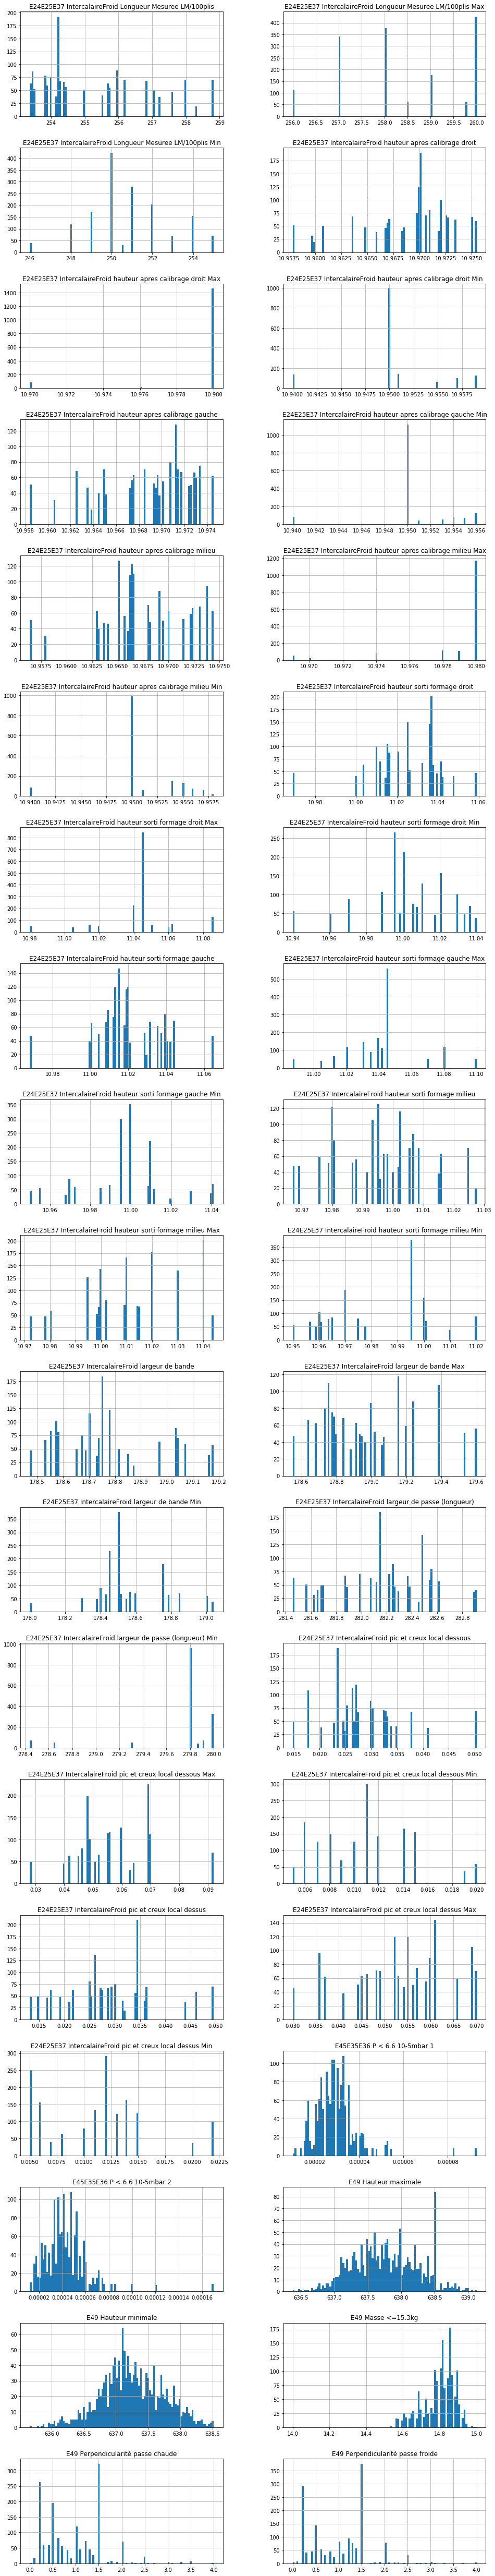

In [ ]:
# Histogram plot of all variables
fig, axes = plt.subplots(len(floats.columns)//2, 2, figsize=(16, 90))

i = 0
for triaxis in axes:
    for axis in triaxis:
        dataframe.hist(column = floats.columns[i], bins = 100, ax=axis)
        i = i+1
plt.show()

<h3>1.3.2 Boxplots</h3>

<p> Pour chacune des variables les box-plots ont été affichés. L’avantage du box-plot réside dans la simplicité de la visualisation. Il est possible de visualiser les moyennes, la distribution par rapport à la moyenne et aussi identifier la présence des pièces marginales pour chacune des variables. On peut aussi avec cet outil visualiser rapidement l’étendue des données. </p>

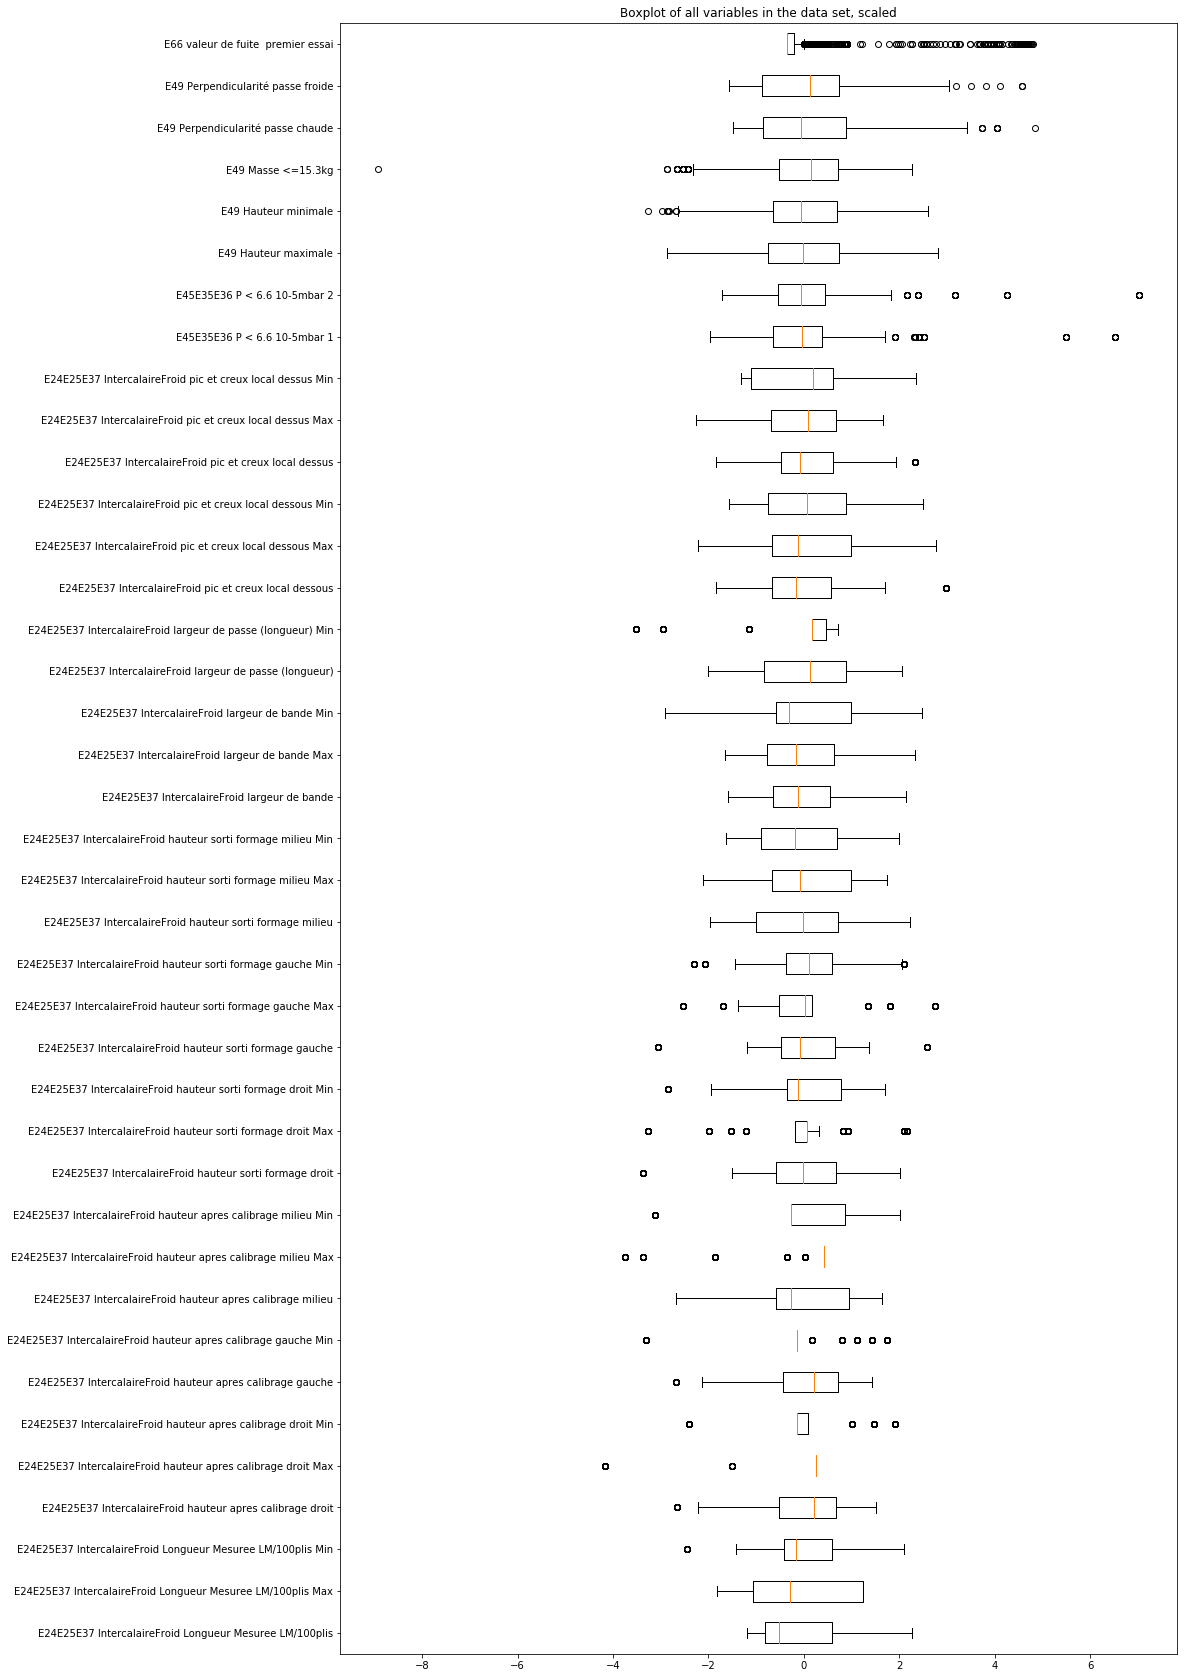

In [ ]:
# Dataset must be normalized in order to compare the distributions
normdataset=scale(floats)
plt.figure(figsize=(15,30))
plt.boxplot(normdataset,vert= False, labels=floats.columns)
plt.title("Boxplot of all variables in the data set, scaled")
plt.show()

<h2>1.4 Définition de la variable de Classification</h2>

<p>Ici, le critère à utiliser pour définir une pièce défectueuse est la valeur du test de fuite. Si cette valeur est supérieure à 20, la pièce est considérée comme défectueuse.</p>

In [ ]:
fuite = dataframe["E66 valeur de fuite  premier essai"]
fuite.head()

0    0.1
1    0.1
2    1.3
3    0.1
4    1.7
Name: E66 valeur de fuite  premier essai, dtype: float64

In [ ]:
# if number of revisions is greater than 0, classify as defect
df_defect = fuite > 20
df_defect.rename(columns={'E66 valeur de fuite  premier essai':'Classification'},errors="raise",inplace=True)
print(df_defect)

0       False
1       False
2       False
3       False
4       False
        ...  
1554    False
1555    False
1556    False
1557    False
1558    False
Length: 1559, dtype: bool


<h2>1.5 Analyse Multidimensionnelle</h2>

<p>Dans cette section, nous commençons à analyser les corrélations entre les variables. En particulier, nous nous concentrerons sur les corrélations avec notre variable "classification" (La variable représentant les pièces présentant des anomalies.)</p>

<h3>1.5.1 Corrélations</h3>

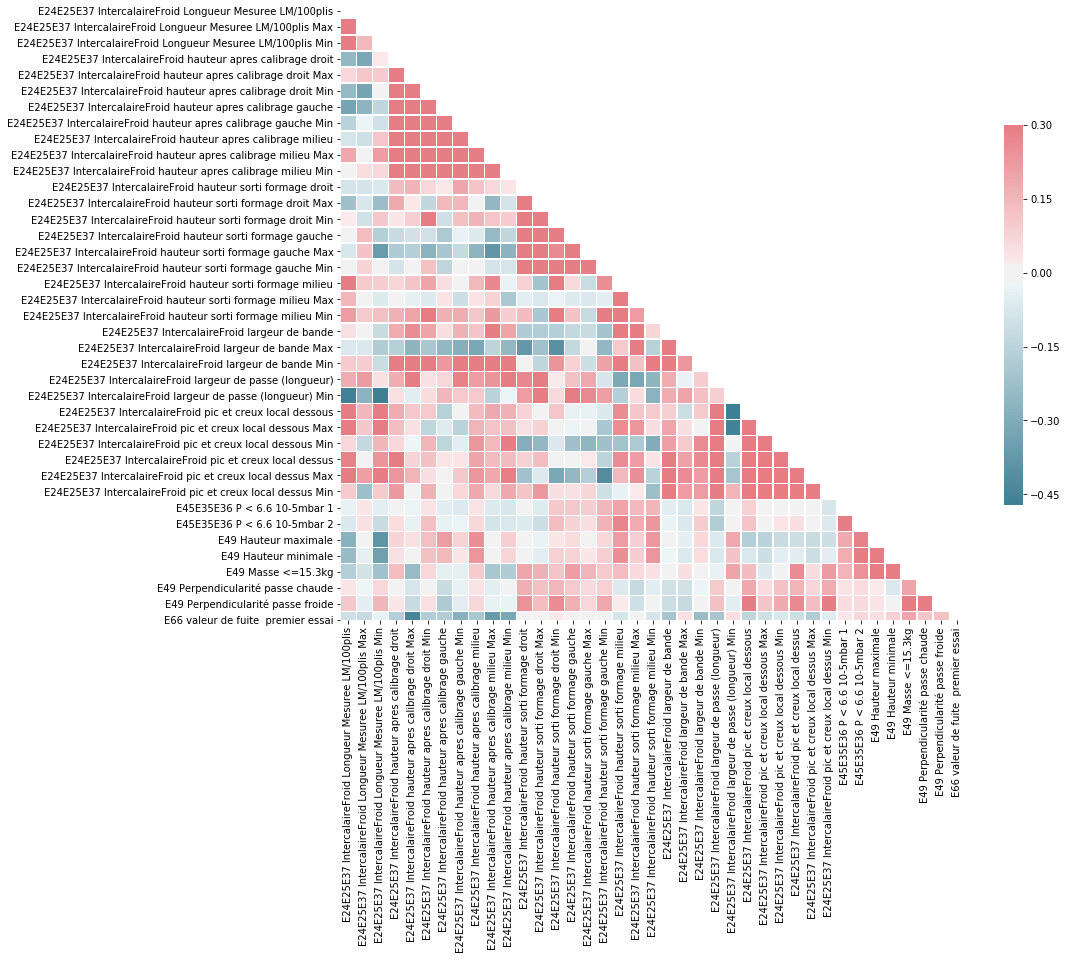

In [ ]:
corr=floats.corr()

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

Le diagramme ci-dessus nous permet déjà de suspecter que certaines variables sont liées à notre variable de classification (valeur de fuite> 20). En effet, les variables fortement corrélées à la valeur de fuite peuvent avoir un effet direct sur la classification. À partir du diagramme, les variables identifiées sont les suivantes:
<ul>
    <li> Intercalaire Froid hauteur apres calibrage droit max
    <li> Intercalaire Froid hauteur apres calbrage milieu max
    <li> Intercalaire Froid hauteur apres calbrage milieu min

</ul>

In [ ]:
# MONTRER QUE LA VARIABLE DE FUITE EST ENLEVÉE (VOIR DERNIERE COLLONNE)
floats

,E24E25E37 IntercalaireFroid Longueur Mesuree LM/100plis,E24E25E37 IntercalaireFroid Longueur Mesuree LM/100plis Max,E24E25E37 IntercalaireFroid Longueur Mesuree LM/100plis Min,E24E25E37 IntercalaireFroid hauteur apres calibrage droit,E24E25E37 IntercalaireFroid hauteur apres calibrage droit Max,E24E25E37 IntercalaireFroid hauteur apres calibrage droit Min,E24E25E37 IntercalaireFroid hauteur apres calibrage gauche,E24E25E37 IntercalaireFroid hauteur apres calibrage gauche Min,E24E25E37 IntercalaireFroid hauteur apres calibrage milieu,E24E25E37 IntercalaireFroid hauteur apres calibrage milieu Max,...,E24E25E37 IntercalaireFroid pic et creux local dessus Max,E24E25E37 IntercalaireFroid pic et creux local dessus Min,E45E35E36 P < 6.6 10-5mbar 1,E45E35E36 P < 6.6 10-5mbar 2,E49 Hauteur maximale,E49 Hauteur minimale,E49 Masse <=15.3kg,E49 Perpendicularité passe chaude,E49 Perpendicularité passe froide,E66 valeur de fuite premier essai
0,257.957143,259.0,255.0,10.969843,10.98,10.95,10.964994,10.95,10.968014,10.98,...,0.049,0.012,0.000028,0.000040,637.510010,636.989990,14.78,1.4,2.5,0.1
1,257.957143,259.0,255.0,10.969843,10.98,10.95,10.964994,10.95,10.968014,10.98,...,0.049,0.012,0.000028,0.000040,637.659973,637.309998,14.80,1.1,1.1,0.1
2,257.957143,259.0,255.0,10.969843,10.98,10.95,10.964994,10.95,10.968014,10.98,...,0.049,0.012,0.000028,0.000040,637.400024,637.080017,14.78,2.0,2.5,1.3
3,257.957143,259.0,255.0,10.969843,10.98,10.95,10.964994,10.95,10.968014,10.98,...,0.049,0.012,0.000028,0.000040,637.090027,636.719971,14.79,1.0,1.4,0.1
4,257.957143,259.0,255.0,10.969843,10.98,10.95,10.964994,10.95,10.968014,10.98,...,0.049,0.012,0.000028,0.000040,637.309998,637.289978,14.79,1.1,1.3,1.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1554,257.594595,260.0,254.0,10.964797,10.98,10.95,10.963459,10.95,10.963770,10.98,...,0.054,0.005,0.000035,0.000071,637.179993,636.729980,14.56,1.5,1.5,0.2
1555,257.594595,260.0,254.0,10.964797,10.98,10.95,10.963459,10.95,10.963770,10.98,...,0.054,0.005,0.000035,0.000071,637.340027,636.929993,14.57,1.5,0.5,0.1
1556,257.594595,260.0,254.0,10.964797,10.98,10.95,10.963459,10.95,10.963770,10.98,...,0.054,0.005,0.000052,0.000053,637.099976,636.859985,14.62,0.2,0.2,0.1
1557,257.594595,260.0,254.0,10.964797,10.98,10.95,10.963459,10.95,10.963770,10.98,...,0.054,0.005,0.000052,0.000053,637.659973,636.590027,14.60,0.2,0.2,0.1


In [ ]:
floats = floats.loc[:, floats.columns != "E66 valeur de fuite  premier essai"]
floats.head()

,E24E25E37 IntercalaireFroid Longueur Mesuree LM/100plis,E24E25E37 IntercalaireFroid Longueur Mesuree LM/100plis Max,E24E25E37 IntercalaireFroid Longueur Mesuree LM/100plis Min,E24E25E37 IntercalaireFroid hauteur apres calibrage droit,E24E25E37 IntercalaireFroid hauteur apres calibrage droit Max,E24E25E37 IntercalaireFroid hauteur apres calibrage droit Min,E24E25E37 IntercalaireFroid hauteur apres calibrage gauche,E24E25E37 IntercalaireFroid hauteur apres calibrage gauche Min,E24E25E37 IntercalaireFroid hauteur apres calibrage milieu,E24E25E37 IntercalaireFroid hauteur apres calibrage milieu Max,...,E24E25E37 IntercalaireFroid pic et creux local dessus,E24E25E37 IntercalaireFroid pic et creux local dessus Max,E24E25E37 IntercalaireFroid pic et creux local dessus Min,E45E35E36 P < 6.6 10-5mbar 1,E45E35E36 P < 6.6 10-5mbar 2,E49 Hauteur maximale,E49 Hauteur minimale,E49 Masse <=15.3kg,E49 Perpendicularité passe chaude,E49 Perpendicularité passe froide
0,257.957143,259.0,255.0,10.969843,10.98,10.95,10.964994,10.95,10.968014,10.98,...,0.0294,0.049,0.012,0.000028,0.00004,637.510010,636.989990,14.78,1.4,2.5
1,257.957143,259.0,255.0,10.969843,10.98,10.95,10.964994,10.95,10.968014,10.98,...,0.0294,0.049,0.012,0.000028,0.00004,637.659973,637.309998,14.80,1.1,1.1
2,257.957143,259.0,255.0,10.969843,10.98,10.95,10.964994,10.95,10.968014,10.98,...,0.0294,0.049,0.012,0.000028,0.00004,637.400024,637.080017,14.78,2.0,2.5
3,257.957143,259.0,255.0,10.969843,10.98,10.95,10.964994,10.95,10.968014,10.98,...,0.0294,0.049,0.012,0.000028,0.00004,637.090027,636.719971,14.79,1.0,1.4
4,257.957143,259.0,255.0,10.969843,10.98,10.95,10.964994,10.95,10.968014,10.98,...,0.0294,0.049,0.012,0.000028,0.00004,637.309998,637.289978,14.79,1.1,1.3


In [ ]:
# SIMILAIREMENT ICI
dataframe = dataframe.loc[:, dataframe.columns != "E66 valeur de fuite  premier essai"]
dataframe.head()

,E24E25E37 IntercalaireFroid Longueur Mesuree LM/100plis,E24E25E37 IntercalaireFroid Longueur Mesuree LM/100plis Max,E24E25E37 IntercalaireFroid Longueur Mesuree LM/100plis Min,E24E25E37 IntercalaireFroid hauteur apres calibrage droit,E24E25E37 IntercalaireFroid hauteur apres calibrage droit Max,E24E25E37 IntercalaireFroid hauteur apres calibrage droit Min,E24E25E37 IntercalaireFroid hauteur apres calibrage gauche,E24E25E37 IntercalaireFroid hauteur apres calibrage gauche Min,E24E25E37 IntercalaireFroid hauteur apres calibrage milieu,E24E25E37 IntercalaireFroid hauteur apres calibrage milieu Max,...,E45E35E36 Position-Position 2,E45E35E36 Position-Position 3,E45E35E36 Position-Position 4,E45E35E36 Position-Position 5,E45E35E36 Position-Position 6,E45E35E36 Position-Position 7,E45E35E36 Position-Position 8,E45E35E36 n° de cycle et n° de version-4035,E49 Contrôle visuel suivant MFT n°408-NOK,E66 nombre de retouches après le premier essai
0,257.957143,259.0,255.0,10.969843,10.98,10.95,10.964994,10.95,10.968014,10.98,...,0,0,0,0,0,0,1,1,1,0
1,257.957143,259.0,255.0,10.969843,10.98,10.95,10.964994,10.95,10.968014,10.98,...,0,0,1,0,0,0,0,1,1,0
2,257.957143,259.0,255.0,10.969843,10.98,10.95,10.964994,10.95,10.968014,10.98,...,1,0,0,0,0,0,0,1,1,0
3,257.957143,259.0,255.0,10.969843,10.98,10.95,10.964994,10.95,10.968014,10.98,...,0,0,0,0,1,0,0,1,1,0
4,257.957143,259.0,255.0,10.969843,10.98,10.95,10.964994,10.95,10.968014,10.98,...,0,1,0,0,0,0,0,1,1,0


<h3>1.5.2 Test de corrélation de Spearman</h3>

<p>Avec ce test, nous souhaitons vérifier la monotonie des variables par rapport à la valeur de fuite. Comme pour la corrélation linéaire de Pearson, si la valeur de sortie du test est 1, les variables sont parfaitement monotones par rapport à la fuite. Cela signifie que lorsque la valeur des variables testées augmente, la valeur de la fuite augmente également. Si la valeur est -1, la monotonie est inverse. Ce test peut découvrir des relations que le test Pearson pourrait masquer et ne suppose pas non plus que la variable à tester est normalement distribuée.</p>

In [ ]:
from scipy.stats import spearmanr

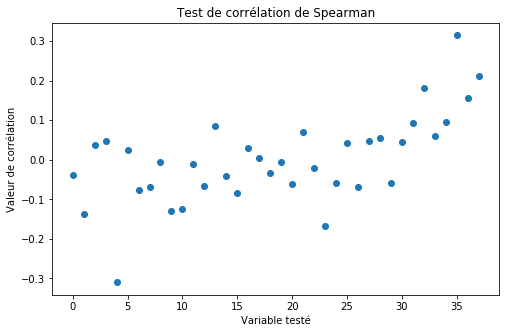

In [ ]:
# Check if variables are monotonically correlated with target variable
spearman_list_coeff=[]

columns = floats.columns

for col in columns:
    spearman_list_coeff.append(spearmanr(floats[col],fuite)[0])
    
plt.figure(figsize=(8,5))
plt.plot(spearman_list_coeff, "o")
plt.xlabel("Variable testé")
plt.ylabel("Valeur de corrélation")
plt.title("Test de corrélation de Spearman")
plt.show()

In [ ]:
# Get the indexes of the variables with the largest coeficient
indexes = np.array(spearman_list_coeff).argsort()[-5:][::-1]

print("The 5 variables that have the largest spearman coeficient are:\n"
      ,columns[indexes[0]],",\n",columns[indexes[1]],",\n",columns[indexes[2]],",\n",columns[indexes[3]],",\n"
      ,columns[indexes[4]])
print("Their values are:\n",spearman_list_coeff[indexes[0]],",\n",spearman_list_coeff[indexes[1]],",\n",
      spearman_list_coeff[indexes[2]],",\n",spearman_list_coeff[indexes[3]],",\n",spearman_list_coeff[indexes[4]])

The 5 variables that have the largest spearman coeficient are:
 E49 Masse <=15.3kg ,
 E49 Perpendicularité passe froide ,
 E45E35E36 P < 6.6 10-5mbar 2 ,
 E49 Perpendicularité passe chaude ,
 E49 Hauteur minimale
Their values are:
 0.3147027637107819 ,
 0.2126263202925231 ,
 0.18106875338776485 ,
 0.15579861862771227 ,
 0.09548716257167975


<h3>1.5.3 Analyse par composantes principales (ACP)</h3>

### <font color='red'> Le dataset utilisé pour cette analyse a été déjà nettoyé et contenait que des variables numériques. Si c'est pas votre cas, il faut utiliser la dataframe floats en dessous et pas le dataframe importé au début et nommé dataframe.</font>

<p>Le but d’une ACP est de réduire la dimension de nos données (passer d’un tableau à 100 colonnes à un tableau à un nombre de colonnes inférieur en perdant le moins d’information possible. Ceci parce que, si on réduit la dimension à 2 colonnes par exemple, les données peuvent être représentables sur un plan. Ici l’information est comprise au sens de la variance des variables.  À partir des toutes les variables quantitatives, l’ACP construit une nouvelle base à partir de laquelle le dataset sera représenté. Cette nouvelle base est constituée par des composantes dites principales (PC1, PC2…) qui apportent chacun une quantité d’information au dataset. Ces composantes principales sont construites par combinaison linéaire des variables du dataset. Pour faciliter la visualisation, il est d’usage d’utiliser les deux composantes les plus explicatives et de les représenter dans un plan. Il est donc possible d’intuiter visuellement les tendances suivies par l'échantillon à partir par exemple de l'identification de groupes ou clustering de données.</p>

In [ ]:
# Importation des fonctions (PCA = Principal component Analysis)
from sklearn.decomposition import PCA

Text(0.5, 1.0, 'Importance de chaque composante principale ')

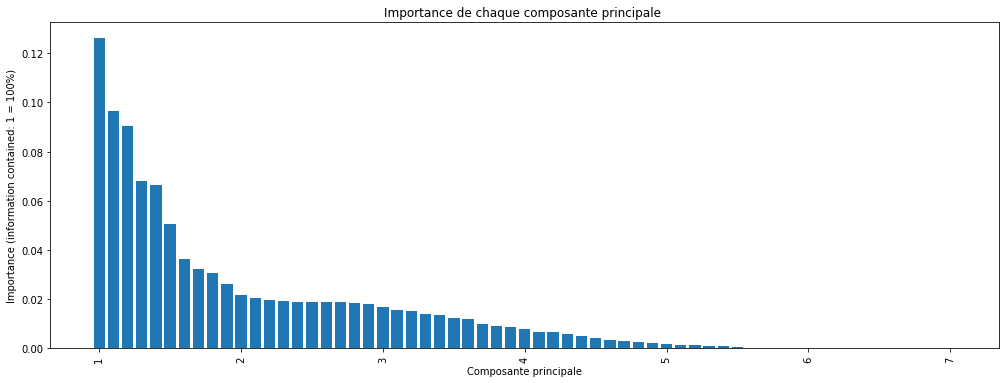

In [ ]:
# Primary component analysis variable
pca = PCA()

# Obtain eigen values
pca_results = pca.fit(scale(dataframe))
valPropres = pca_results.explained_variance_ratio_

# Plot the eigen values
fig, axes = plt.subplots(figsize=(17,6))

# Plotting bar graph
ind = np.arange(len(valPropres))  # The x locations for the groups
axes.bar(ind, valPropres)         # Plot the bar graph

# Setting bar labels
#axes.set_xticks(ind)
axes.set_xticklabels(ind, rotation=90)

# Other graph properties
axes.set_xlabel('Composante principale')
axes.set_ylabel('Importance (information contained: 1 = 100%)')
axes.set_title('Importance de chaque composante principale ')

Text(0.5, 1.0, 'Importance de chaque composante principale ')

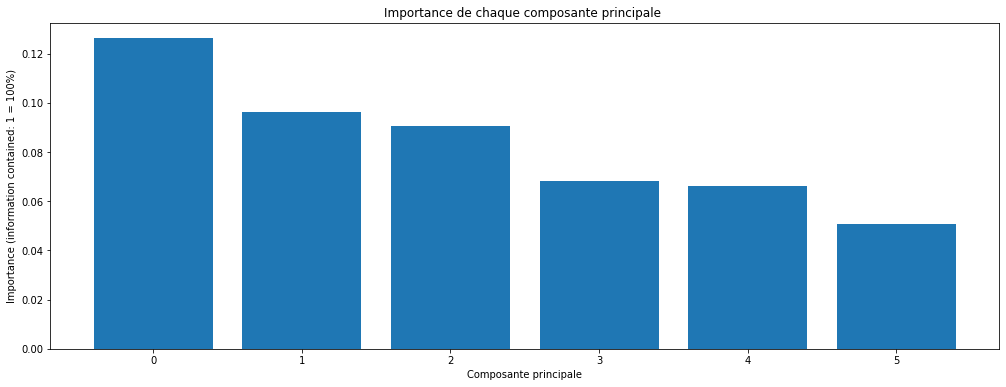

In [ ]:
## FIGURE RÉDUITE ##
# Plot the eigen values
fig, axes = plt.subplots(figsize=(17,6))

valPropresTraitees=list(filter(lambda x: True if x>0.05 else False , valPropres))

# Plotting bar graph
ind = np.arange(len(valPropresTraitees))  # The x locations for the groups
axes.bar(ind, valPropresTraitees)         # Plot the bar graph

# Setting bar labels
axes.set_xticks(ind)

# Other graph properties
axes.set_xlabel('Composante principale')
axes.set_ylabel('Importance (information contained: 1 = 100%)')
axes.set_title('Importance de chaque composante principale ')

Cette première figure illustre l’importance de chacune des composantes principales. Plus la composante est importante, plus le pourcentage est élevé. Ce pourcentage représente la quantité d'informations "capturée" ou illustrée par la composante principale donnée. Idéalement, la plupart des informations sont contenues dans les deux premières barres du graphique à barres. Cela signifie que le jeu de données peut être affiché en 2D sans perte d'informations notable. Malheureusement, ce n'est pas le cas ici, car seulement environ 5% des informations sont contenues dans les deux premières directions.

Text(0.5, 1.0, 'Informations cumulatives capturées en fonction des composantes principales')

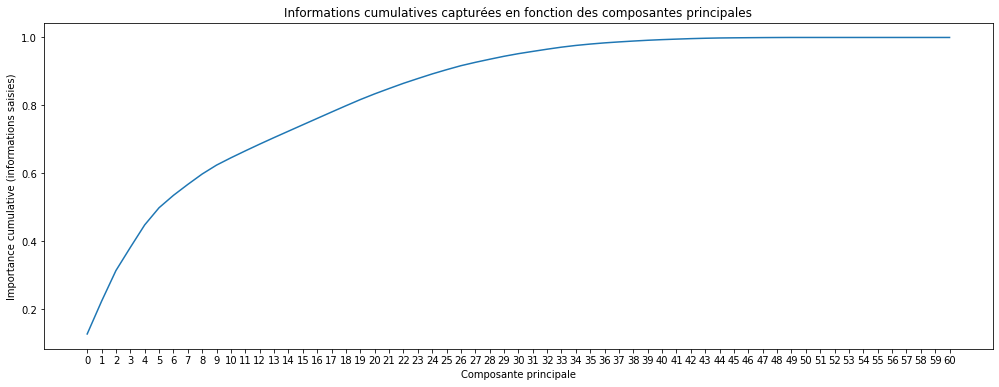

In [ ]:
# Graph of the cumulative percentage of variation information obtained
eigen_var_percentage = pca_results.explained_variance_ratio_
cumulative = np.zeros(len(eigen_var_percentage))

# Succesively cumulate the percentage variance. 
for i in range(len(eigen_var_percentage)):
    if i == 0:
        cumulative[i] = eigen_var_percentage[i]
    else:
        cumulative[i] = cumulative[i-1] + eigen_var_percentage[i]
        
# Plot the valeur propres
fig, axes = plt.subplots(figsize=(17,6))

# Plotting bar graph
ind = np.arange(len(cumulative))  # the x locations for the groups
axes.plot(ind, cumulative)

# Setting bar labels
axes.set_xticks(ind)

# Other graph properties
axes.set_xlabel('Composante principale')
axes.set_ylabel('Importance cumulative (informations saisies)')
axes.set_title('Informations cumulatives capturées en fonction des composantes principales')

Cette figure montre la même information mais d'une manière différente. Cette fois, l'axe des ordonnées illustre le pourcentage cumulé jusqu'a une composante donnée. Idéalement, le pourcentage d'informations de la composante principal 2 est supérieur ou égale à 90%. Cela signifierait que 90% de l'information est contenue dans les deux premiers composants principaux. Encore une fois, cette figure montre que nous ne sommes pas dans ce cas idéal car il serait nécessaire environ 100 composantes principales pour capturer 90% de l'information.

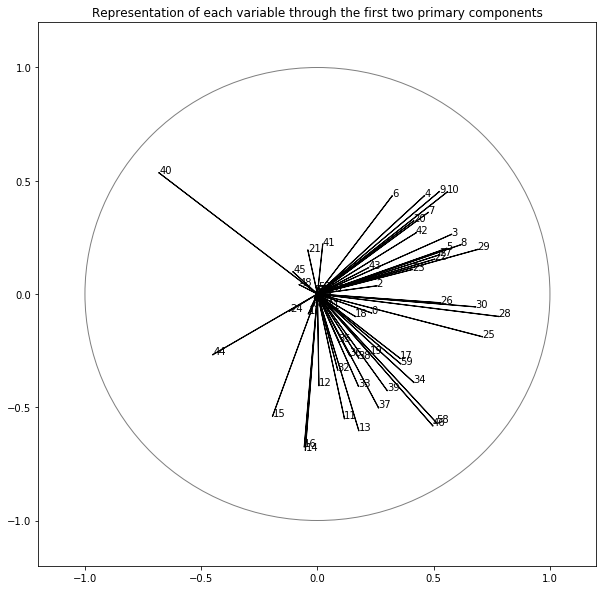

In [ ]:
## coordonnées et représentation des variables
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])

# Initialisation de la figure
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
names = range(len(dataframe.columns))
for i, j, nom in zip(coord1,coord2, names):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.title("Representation of each variable through the first two primary components")
plt.show()

La figure ci-dessus nous fournit plus d'informations. Essentiellement, il nous fournit des informations sur l’influence de chacune des variables sur les deux premières composantes principales. Si les variables pointent dans la même direction, elles sont corrélées. Si une variable a un "court" vecteur, alors il est mal représenté par les deux premières composantes principales. 

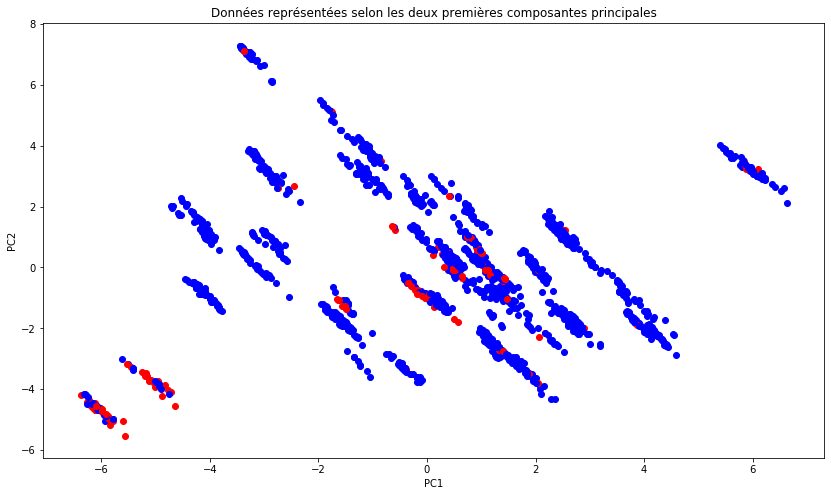

In [ ]:
# C contains the data described in the primary components base
C = pca_results.transform(scale(dataframe))

colors = []

# Set the vector of colours indicating if part is classified or not.  
for i in range(len(df_defect)):
    if df_defect.iloc[i]:
        # Part is "defected"
        colors.append('r') # firebrick
    else:
        # Part is not defected
        colors.append('b') # royalblue

plt.figure(figsize=(14,8))
# Plot using only the coordinates of the first two primary components
for i, j, broken in zip(C[:,0],C[:,1],colors):
    plt.scatter(i, j, color=broken)

# Plot features
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Données représentées selon les deux premières composantes principales")
plt.show()

<p>Malgré les conclusions ci-dessus, nous pouvons toujours essayer de représenter les données en deux étapes et voir si des groupes intéressants se démarquent. Tout d'abord, il convient de noter que, comme le graphique ci-dessus représente l'ensemble de nos données en deux dimensions, de nombreuses informations sont perdues. Les points bleus représentent les bonnes pièces. Les points rouges représentent les pièces présentant des anomalies. Généralement, ces points sont dispersés un peu partout et donc les deux composants principaux ne suffisent pas pour comprendre ce qui caractérise une partie avec des anomalies. Cependant, nous pouvons identifier que si les pièces sont situées dans le coin en haut a gauche, la probabilité d’anomalies est plus grande. Cela se voit par la grande concentration de points rouges dans le coin supérieur gauche. En revanche, pour beaucoup d'autres points, les anomalies sont confondues dans un nuage de pieces bonnes. Notre modele d'ACP ne permet pas de connaitre l'origine de ces non conformités.</p>

In [ ]:
vec = pca.components_[0]
indexes = vec.argsort()[-5:][::-1]
columns = dataframe.columns
print("The 5 variables that have the largest contribution for PC1 are:\n"
      ,columns[indexes[0]],",\n",columns[indexes[1]],",\n",columns[indexes[2]],",\n",columns[indexes[3]],",\n"
      ,columns[indexes[4]])
print("Their values are:\n",vec[indexes[0]],",\n",vec[indexes[1]],",\n",vec[indexes[2]],",\n",vec[indexes[3]]
      ,",\n",vec[indexes[4]])


The 5 variables that have the largest contribution for PC1 are:
 E24E25E37 IntercalaireFroid pic et creux local dessus ,
 E24E25E37 IntercalaireFroid pic et creux local dessous ,
 E24E25E37 IntercalaireFroid pic et creux local dessus Max ,
 E24E25E37 IntercalaireFroid pic et creux local dessus Min ,
 E24E25E37 IntercalaireFroid hauteur apres calibrage milieu
Their values are:
 0.2803909248454012 ,
 0.2547784842305692 ,
 0.24802304387848673 ,
 0.2440227058168397 ,
 0.22153740165748023


In [ ]:
vec = pca.components_[1]
indexes = vec.argsort()[-5:][::-1]
columns = dataframe.columns
print("The 5 variables that have the largest contribution for PC2 are:\n"
      ,columns[indexes[0]],",\n",columns[indexes[1]],",\n",columns[indexes[2]],",\n",columns[indexes[3]],"\n"
      ,columns[indexes[4]])
print("Their values are:\n",vec[indexes[0]],",\n",vec[indexes[1]],",\n",vec[indexes[2]],",\n",vec[indexes[3]]
      ,",\n",vec[indexes[4]])


The 5 variables that have the largest contribution for PC2 are:
 E29 IntercalaireFroid ,
 E24E25E37 IntercalaireFroid hauteur apres calibrage milieu Max ,
 E24E25E37 IntercalaireFroid hauteur apres calibrage milieu Min ,
 E24E25E37 IntercalaireFroid hauteur apres calibrage droit Max 
 E24E25E37 IntercalaireFroid hauteur apres calibrage gauche
Their values are:
 0.2199395663065404 ,
 0.18581002490697648 ,
 0.18532178325807588 ,
 0.1783884821366152 ,
 0.17770665919998557


Dans le texte ci-dessus, nous avons décidé d’afficher les variables les plus fortement corrélées aux composantes principales en raison de la concentration élevée de pièces défectueuses dans le coin supérieur gauche du graphique PCA. Nous voyons des similitudes dans le nom des variables avec les variables identifiées dans la matrice de corrélation. Cependant, il ne faut pas oublier que bon nombre des erreurs sont centrées sur le centre du diagramme, ce qui signifie que les variables décrites ci-dessus peuvent ne pas être les seules responsables des anomalies identifiées. Autre remarque: ici, les données qualitatives sont aussi prises en compte, en plus desdonnées quantitatives. L'analyse est donc plus complete que la seule matrice de covariance. 

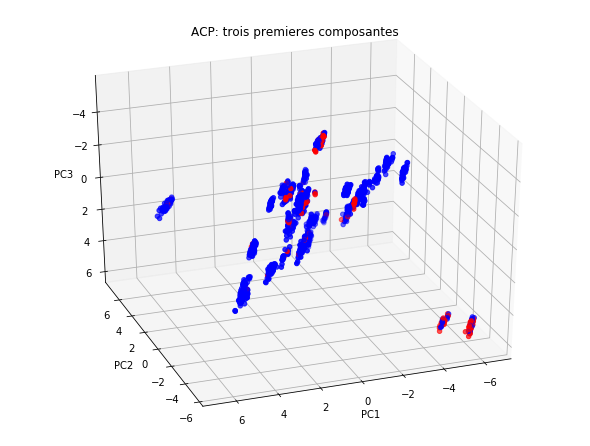

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

ax.scatter(C[:, 0], C[:, 1], C[:, 2], c=colors, cmap=plt.cm.Paired)
ax.set_title("ACP: trois premieres composantes")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()

No handles with labels found to put in legend.


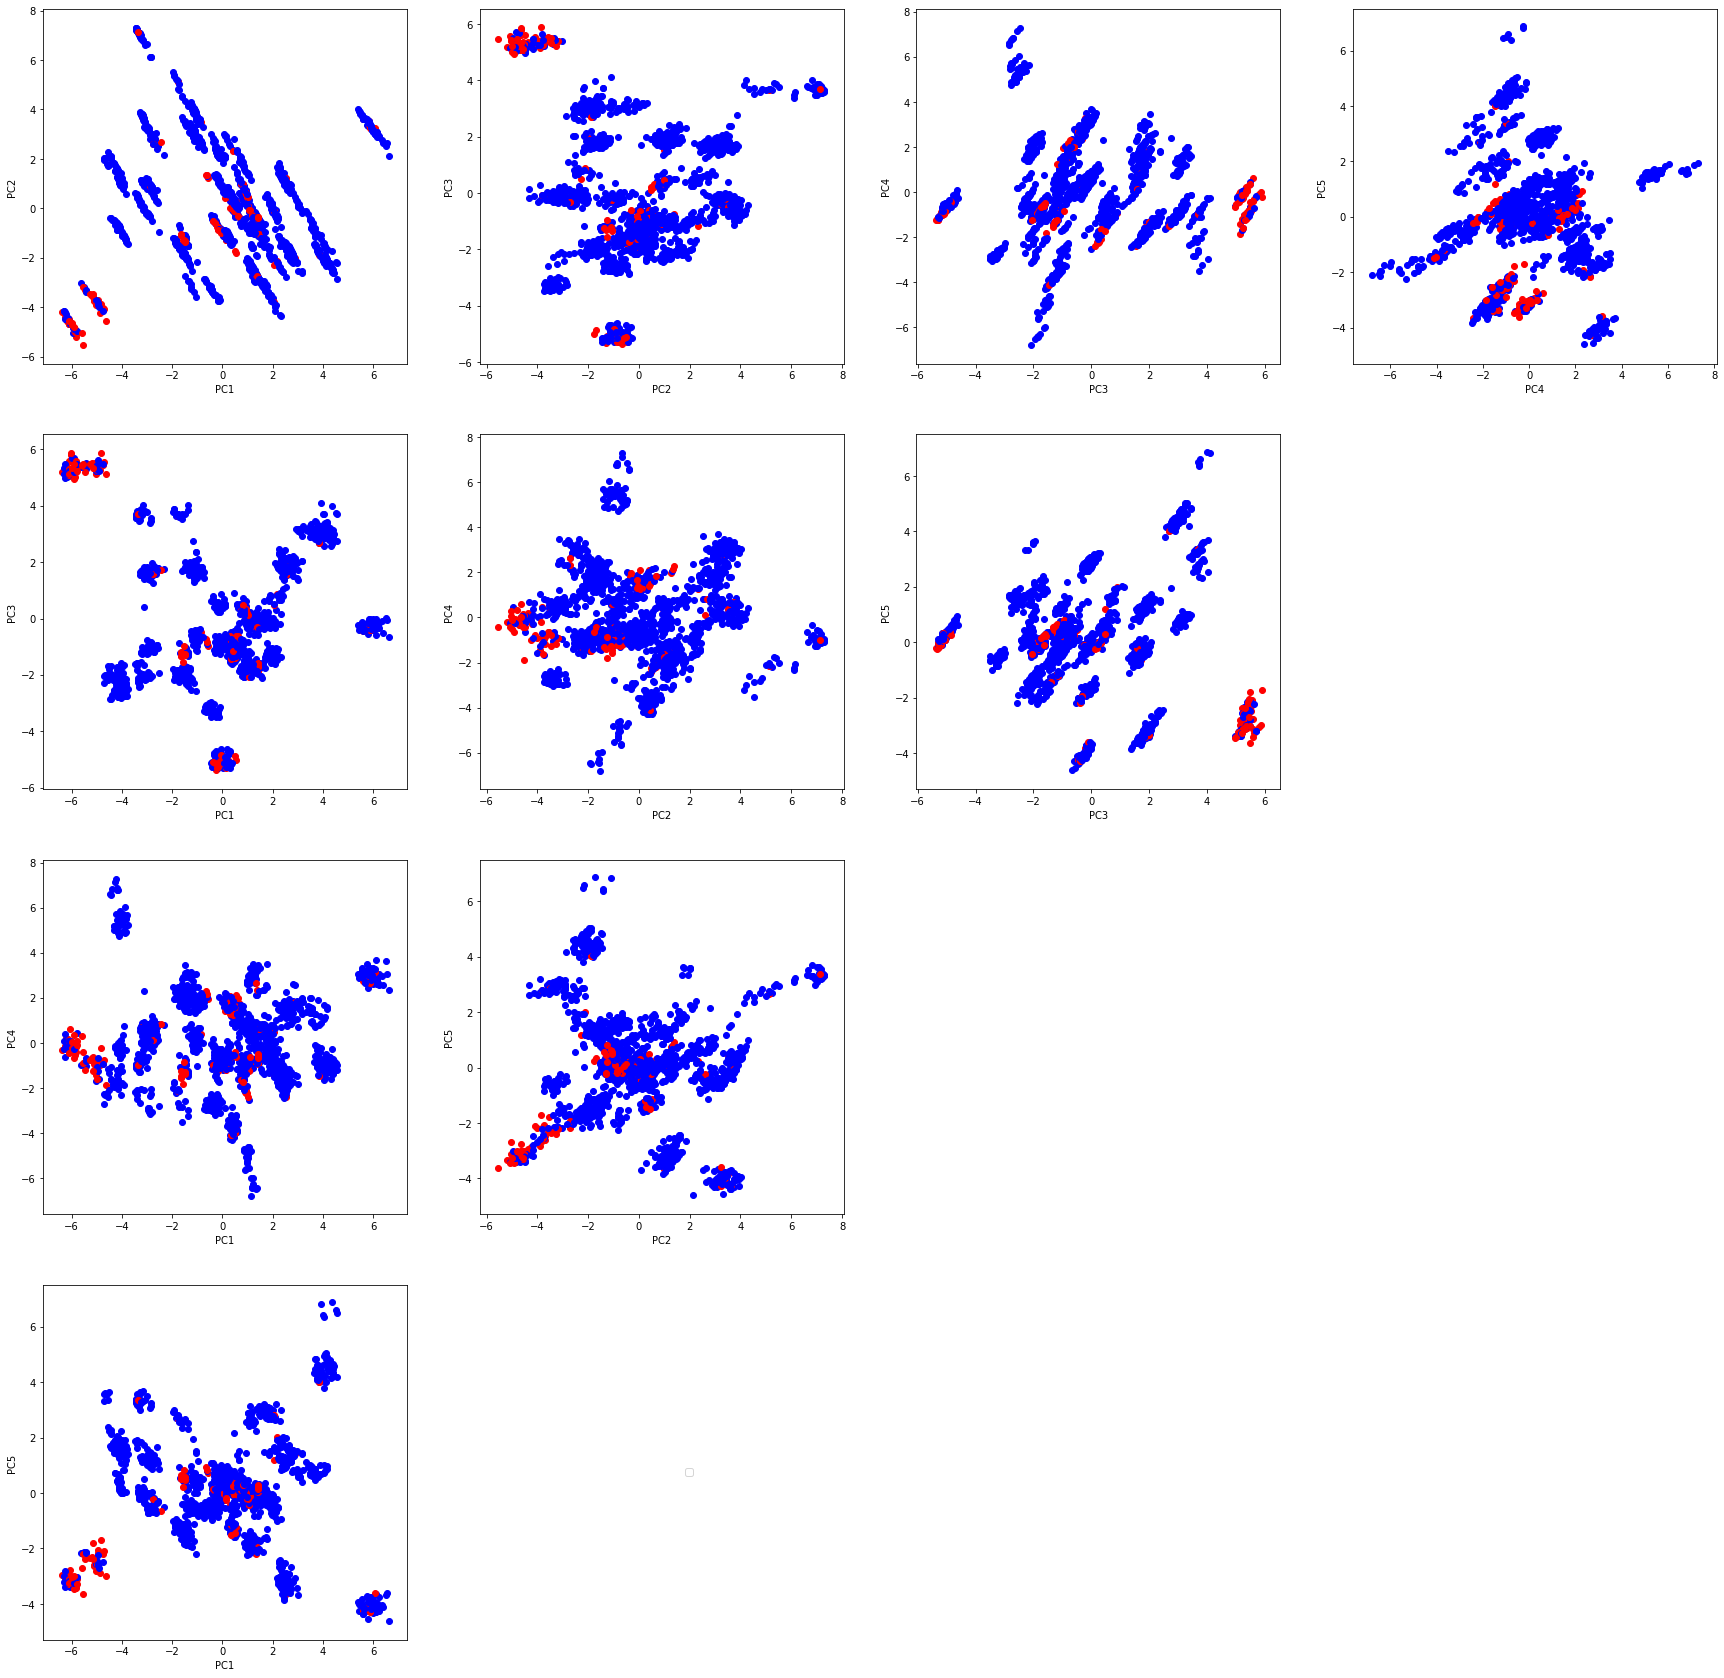

In [ ]:
X_c = pca.fit_transform(dataframe)

cmaps = plt.get_cmap("Accent")
fig = plt.figure(figsize= (30,30))
count = 0
for nbc, nbc2, count in [(1,2,1), (2,3,2), (3,4,3), (4,5,4), (1,3,5), (2,4,6), (3,5,7), (1,4,9), (2,5,10), (1,5,13)] :
    ax = fig.add_subplot(4,4,count)
    for i, j, broken in zip(C[:,nbc-1],C[:,nbc2-1],colors):
        ax.scatter(i, j, color=broken)
    ax.set_xlabel("PC%d" %(nbc), fontsize=10)
    ax.set_ylabel("PC%d" %(nbc2), fontsize=10)
plt.legend(loc='upper right', bbox_to_anchor=(1.8, 0.5), markerscale=10)
plt.show()

<h3>1.5.4 Analyse factoriel discriminante (AFD)</h3>

<p>L'analyse AFD est très similaire à l'analyse précédente, à la différence près qu'elle utilise les informations de la classification à l'avance. Cela signifie que nous introduisons au modèle les informations sur les pièces qui ont des anomlies. Cela l'aidera à séparer les données plus efficacement. Une autre caractéristique de l’AFD est qu’il tente de représenter les données dans k-1 dimensions où k est le nombre de classifications dont nous disposons. Etant donné qu'une pièce présente des anomalies ou ne présente pas des anomalies, k = 2, la représentation résultante sera donnée en dimension 1.</p>

In [ ]:
# Import LDA library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Scale the data
scaled_data = scale(dataframe)
# Apply LDA and transform data
method = LinearDiscriminantAnalysis(n_components=1)
lda=method.fit(scaled_data,colors)
Clda=lda.transform(scaled_data)

/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


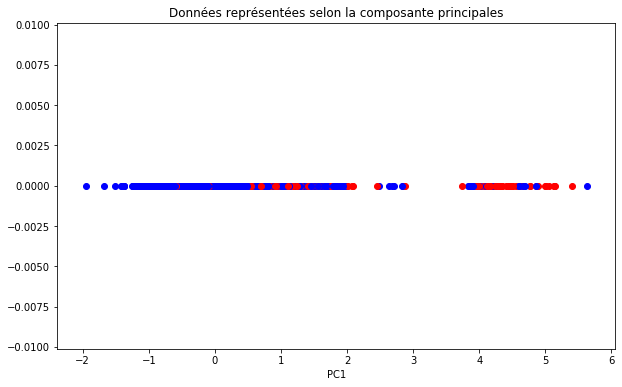

In [ ]:
# Plot in 2 dimensions even though in this case we have 1 dimension output
plt.figure(figsize=(10,6))
for i, clr in zip(Clda[:,0], colors):
    plt.scatter(i,0, color=clr)

    # Plot features
plt.xlabel("PC1")
plt.title("Données représentées selon la composante principales")
plt.show()

In [ ]:
vec = method.coef_[0]
indexes = vec.argsort()[-5:][::-1]
columns = dataframe.columns
print("The 5 variables that have the largest contribution for PC1 are:\n"
      ,columns[indexes[0]],",\n",columns[indexes[1]],",\n",columns[indexes[2]],",\n",columns[indexes[3]]
      ,",\n",columns[indexes[4]])
print("Their values are:\n",vec[indexes[0]],",\n",vec[indexes[1]],",\n",vec[indexes[2]],",\n",vec[indexes[3]]
      ,",\n",vec[indexes[4]])

The 5 variables that have the largest contribution for PC1 are:
 E45E35E36 n° de cycle et n° de version-4035 ,
 E24E25E37 IntercalaireFroid hauteur sorti formage droit Min ,
 E24E25E37 IntercalaireFroid hauteur apres calibrage droit ,
 E24E25E37 IntercalaireFroid Longueur Mesuree LM/100plis Max ,
 E24E25E37 IntercalaireFroid hauteur sorti formage droit
Their values are:
 2.069236537754287 ,
 1.4934696411675872 ,
 1.1708946207997561 ,
 0.9990650527931624 ,
 0.9389787392104358


<h3> 1.5.5 Classification ascendante hierarchique: </h3> 

<p> La classification ascendante hiérarchique permet de faire des regroupements de variables selon que leur inter-corrélation. L’affichage de sortie de la classification ascendante hiérarchique est appelé un dendrogramme et représente les variables liées entre elles ainsi que le saut de variance qui accompagne l’association d’un groupe à un autre. Ainsi, avec une très grande variance, toutes les variables sont liées entre elles, puis, en diminuant la variances, des groupes de variables se détachent. </p>

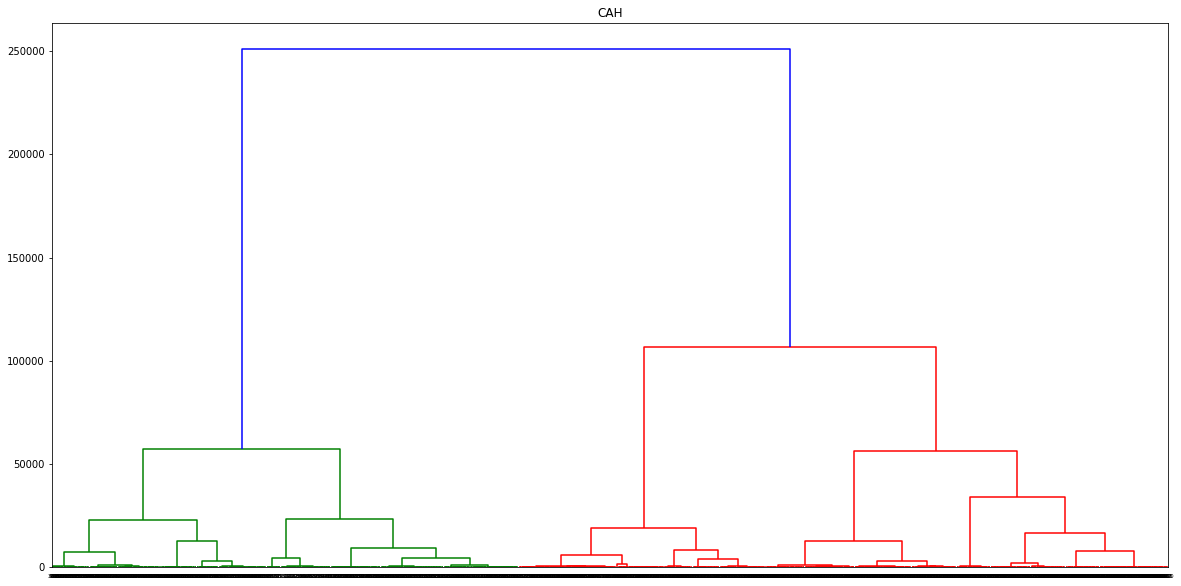

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
#générer la matrice des liens
Z = linkage(dataframe,method='ward',metric='euclidean')
#affichage du dendrogramme
plt.figure(figsize=(20,10))
plt.title("CAH")

dendrogram(Z, labels=dataframe.index, leaf_rotation=0)
plt.show()